In [1]:
from datetime import datetime

now = datetime.now()
today = now.strftime("%Y-%m-%d")
today

'2025-06-15'

1. manse_tool_agent
2. retriever_tool_agent
3. 일반 답변에 대한 web search

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Enhanced Retriever 및 Chain (Query Expansion 포함)

In [4]:
# 기존 Retriever 및 Chain (원래대로 복원)
from pdf_retriever_saju import pdf_rag_chain, compression_retriever

pdf_retriever = compression_retriever()
pdf_chain = pdf_rag_chain()

In [5]:
# Manse_tool

In [1]:
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
from manse_tool import calculate_saju_tool

# Agent 생성 시 tools 리스트에 추가

llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)
tools = [calculate_saju_tool]  # 사주 툴 추가

manse_tool_agent = create_react_agent(llm, tools)

In [2]:
response = manse_tool_agent.invoke({"messages": [("user", "1995년 3월 28일 남자, 11시 30분 출생")]})

In [3]:
print(response["messages"][-1].content)

1995년 3월 28일 11시 30분에 태어난 남성의 사주팔자를 분석해보면 다음과 같습니다.

년주는 을해, 월주는 기묘, 일주는 무오, 시주는 무오입니다. 일간은 무(土)입니다.

오행의 강약을 보면 목이 39점, 화가 20점, 토가 68점, 금이 0점, 수가 10점으로 토(土)의 기운이 가장 강하고 금(金)의 기운이 부족한 편입니다.

십신 분석에서는 년주에 정관과 편재, 편관이 있고, 월주에 겁재와 정관, 일주와 시주에는 정인과 겁재가 주로 나타납니다.

대운은 5세부터 무인, 15세부터 정축, 25세부터 병자, 35세부터 을해 대운이 이어집니다.

이 사주는 토의 기운이 강해 안정적이고 현실적인 성향이 강할 수 있으며, 금의 기운이 부족해 결단력이나 변화에 대한 대응이 다소 약할 수 있습니다. 대운의 흐름에 따라 인생의 중요한 변화와 기회가 찾아올 것입니다. 더 구체적인 운세나 조언이 필요하면 알려주세요.


In [12]:
response = manse_tool_agent.invoke({"messages": [("user", "1995년 9월 22일 남자, 12시 ")]})

In [13]:
print(response["messages"][-1].content)

1995년 9월 22일 12시에 태어난 남성의 사주팔자는 다음과 같습니다.

- 년주: 을해
- 월주: 을유
- 일주: 병진
- 시주: 갑오
- 일간: 병

오행 강약 점수는 목 68점, 화 30점, 토 13점, 금 15점, 수 11점으로 목의 기운이 가장 강합니다.

십신 분석에 따르면, 년주는 정인과 편관, 편인이 혼재되어 있고, 월주는 정인과 정재, 일주는 식신, 정인, 정관, 시주는 편인, 겁재, 상관이 있습니다.

대운은 5세부터 시작하여 10년 단위로 갑신, 계미, 임오, 신사 순으로 변화합니다.

이 사주는 목의 기운이 강하고, 정인과 편인, 정재, 식신 등의 기운이 조화를 이루고 있어 학문이나 예술, 창의적인 분야에서 두각을 나타낼 수 있습니다. 대운에 따라 인생의 중요한 전환점이 있으니 참고하시면 좋겠습니다.


In [6]:
question = "Could you provide a birth chart analysis for a male born on september 22, 1995, at 12:? focusing on the Four Pillars of Destiny (Ba Zi)?"
response = manse_tool_agent.invoke({"messages": [("user", question)]})

In [7]:
print(response["messages"][-1].content)

The Four Pillars of Destiny (Ba Zi) analysis for a male born on September 22, 1995, at 15:29 (Asia/Seoul timezone) is as follows:

Pillars:
- Year Pillar: 을해 (Eul-Hae)
- Month Pillar: 을유 (Eul-Yu)
- Day Pillar: 병진 (Byeong-Jin)
- Hour Pillar: 병신 (Byeong-Shin)
- Day Master (Day Stem): 병 (Byeong)

Five Elements Strength:
- Wood: 48 points
- Fire: 40 points
- Earth: 10 points
- Metal: 24 points
- Water: 15 points

Ten Gods Analysis:
- Year Pillar: Heavenly Stem - Proper Resource, Earthly Branch - 70% Indirect Officer, 30% Indirect Resource
- Month Pillar: Heavenly Stem - Proper Resource, Earthly Branch - Direct Wealth (100%)
- Day Pillar: Earthly Branch - 60% Eating God, 30% Proper Resource, 10% Proper Officer
- Hour Pillar: Earthly Branch - 60% Indirect Wealth, 30% Indirect Officer, 10% Eating God

Luck Cycles (Daeyun):
- Age 5: Gap-Shin (2000-2009)
- Age 15: Gye-Mi (2010-2019)
- Age 25: Im-O (2020-2029)
- Age 35: Sin-Sa (2030-2039)

This chart shows a strong presence of Wood and Fire elem

In [25]:
from langchain_core.tools.retriever import create_retriever_tool
from langchain_core.prompts import PromptTemplate


# PDF 문서를 기반으로 검색 도구 생성
retriever_tool = create_retriever_tool(
    pdf_retriever,
    "pdf_retriever",
    "A tool for searching information related to Saju (Four Pillars of Destiny)",
    document_prompt=PromptTemplate.from_template(
        "<document><context>{page_content}</context><metadata><source>{source}</source><page>{page}</page></metadata></document>"
    ),
)


In [26]:
retriever_tools = [retriever_tool]

In [27]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI
from langchain_core.prompts import load_prompt, ChatPromptTemplate, MessagesPlaceholder

llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

retriever_tool_agent = create_react_agent(llm, retriever_tools)

base_prompt = load_prompt("prompt/saju-rag-promt_2.yaml")
saju_prompt = ChatPromptTemplate.from_messages([
    ("system", base_prompt.template),
    MessagesPlaceholder("messages"),
])
retriever_tool_agent = create_react_agent(llm, retriever_tools, prompt=saju_prompt) 

In [28]:
response = retriever_tool_agent.invoke({"messages": [("user", "1995년 3월 28일 남자의 사주 알려줘")]})

In [29]:
print(response["messages"][-1].content)

안녕하세요. 1995년 3월 28일 남자분의 사주를 분석해 드리겠습니다.

먼저, 입력하신 생년월일은 양력 1995년 3월 28일입니다. 출생시간이 없으므로 기본적으로 자시(子時, 23:00~01:00)로 가정하여 시간기둥을 계산하겠습니다. 만약 정확한 출생시간을 알려주시면 더 정확한 분석이 가능합니다.

---

### 1. 사주 구조 (천간지지 변환)

- 연주(년주): 1995년 → 을해(乙亥)
- 월주(월주): 3월 → 을묘(乙卯)
- 일주(일주): 28일 → 병인(丙寅)
- 시주(시주): 자시(子時) → 임자(壬子)

따라서 사주는 다음과 같습니다.

| 구분 | 천간 | 지지 |
|------|------|------|
| 연주 | 乙   | 亥   |
| 월주 | 乙   | 卯   |
| 일주 | 丙   | 寅   |
| 시주 | 壬   | 子   |

---

### 2. 오행(五行) 분석

#### 1) 천간지지 → 오행 매핑

| 오행 | 해당 천간/지지 |
|-------|----------------|
| 목(木) | 甲, 乙, 寅, 卯 |
| 화(火) | 丙, 丁, 巳, 午 |
| 토(土) | 戊, 己, 辰, 戌, 丑, 未 |
| 금(金) | 庚, 辛, 申, 酉 |
| 수(水) | 壬, 癸, 子, 亥 |

#### 2) 8글자 오행 분류 및 점수

| 글자 | 오행 | 점수 |
|-------|-------|-------|
| 乙 (연간) | 목 | 1 |
| 亥 (연지) | 수 | 1 |
| 乙 (월간) | 목 | 1 |
| 卯 (월지) | 목 | 1 |
| 丙 (일간) | 화 | 1 |
| 寅 (일지) | 목 | 1 |
| 壬 (시간) | 수 | 1 |
| 子 (시지) | 수 | 1 |

#### 3) 오행별 합산

| 오행 | 점수 | 해당 글자 |
|-------|-------|------------|
| 목(木) | 4 | 乙, 乙, 卯, 寅 |
| 화(火) | 1 | 丙 |
| 토(土) | 0 | - |
| 금(金) | 0 |

In [30]:
# Query Expansion Agent (manse_tool처럼 간단하게)
from query_expansion_agent import get_query_expansion_agent

query_expansion_agent = get_query_expansion_agent()


In [31]:
# Query Expansion Agent 올바른 사용법 테스트
response = query_expansion_agent.invoke({"messages": [("user", "1995년 3월 28일 남자 사주")]})
print(response["messages"][-1].content)


확장된 영어 질문은 다음과 같습니다:

"Could you provide a birth chart analysis for a male born on March 28, 1995, focusing on the Four Pillars of Destiny (Ba Zi)? I am interested in understanding the implications of his birth date on his personality, career prospects, and overall life path. Please analyze the birth chart and Great Luck Period (Da Yun) based on Four Pillars of Destiny."

이 질문을 사용하여 문서 검색을 진행해 보세요. 추가적인 도움이 필요하시면 말씀해 주세요!


In [32]:
from langchain_community.utilities.duckduckgo_search import DuckDuckGoSearchAPIWrapper

In [33]:
from query_expansion_agent import get_query_expansion_node

query_expansion_node = get_query_expansion_node()

# 노드 테스트
test_state = {"messages": [("user", "정관이 뭐야?")]}
result = query_expansion_node(test_state)

In [34]:
print(result)

{'messages': [('user', '정관이 뭐야?')], 'expanded_query': 'What is the concept of "Jeonggwan" (正官) in the context of the Four Pillars of Destiny (Ba Zi)? I would like to understand its significance and how it influences one\'s birth chart analysis, particularly in relation to career and authority.', 'original_query': "('user', '정관이 뭐야?')", 'expansion_result': '\n[Query Expansion 결과]\n원본 질문: (\'user\', \'정관이 뭐야?\')\n확장된 영어 질문: What is the concept of "Jeonggwan" (正官) in the context of the Four Pillars of Destiny (Ba Zi)? I would like to understand its significance and how it influences one\'s birth chart analysis, particularly in relation to career and authority.\n\n검색을 위해 확장된 쿼리를 사용합니다.\n'}


In [35]:
from query_expansion_agent import get_query_expansion_node

query_expansion_node = get_query_expansion_node()

# 노드 테스트
test_state = {"messages": [("user", "1995년 3월 28일 남자 사주")]}
result = query_expansion_node(test_state)

print("노드 테스트 결과:")
print(f"원본 질문: {result.get('original_query')}")
print(f"확장된 질문: {result.get('expanded_query')}")
print(f"확장 결과: {result.get('expansion_result')}")

노드 테스트 결과:
원본 질문: ('user', '1995년 3월 28일 남자 사주')
확장된 질문: Could you provide a detailed analysis of the Four Pillars of Destiny (Ba Zi) for a male born on March 28, 1995? I am interested in understanding the implications of his birth chart, including the interactions between the Heavenly Stems and Earthly Branches, as well as any insights regarding his personality, career prospects, and potential life challenges based on his specific date of birth. Please analyze the birth chart and Great Luck Period (Da Yun) based on Four Pillars of Destiny.
확장 결과: 
[Query Expansion 결과]
원본 질문: ('user', '1995년 3월 28일 남자 사주')
확장된 영어 질문: Could you provide a detailed analysis of the Four Pillars of Destiny (Ba Zi) for a male born on March 28, 1995? I am interested in understanding the implications of his birth chart, including the interactions between the Heavenly Stems and Earthly Branches, as well as any insights regarding his personality, career prospects, and potential life challenges based on his speci

In [36]:
from langchain_teddynote.tools.tavily import TavilySearch
from langchain.tools import DuckDuckGoSearchRun, DuckDuckGoSearchResults

tavily_tool = TavilySearch(
    max_results=5,
    include_domains=["namu.wiki", "wikipedia.org"]
)

duck_tool = DuckDuckGoSearchResults(
    max_results=5,
)

In [37]:
from langchain_teddynote.tools.tavily import TavilySearch
from langchain.tools import DuckDuckGoSearchRun, DuckDuckGoSearchResults
from langchain_core.documents import Document

tavily_tool = TavilySearch(
    max_results=5,
    include_domains=["namu.wiki", "wikipedia.org"]
    
)

duck_tool = DuckDuckGoSearchResults(
    max_results=5,
)

In [38]:
# web_tool = [tavily_tool]
web_tool = [tavily_tool, duck_tool]

In [39]:
prompt = """
사주 또는 사주 오행의 개념적 질문이나, 일상 질문이 들어오면, web search를 통해 답합니다.
"""
web_tool_agent = create_react_agent(llm, tools=web_tool, prompt=prompt)

In [40]:
response = web_tool_agent.invoke({"messages": [("user", "사주오행에 대해서 설명해줘")]})

In [41]:
response

{'messages': [HumanMessage(content='사주오행에 대해서 설명해줘', additional_kwargs={}, response_metadata={}, id='dffa0d30-8787-4181-8b60-494622f3584d'),
  AIMessage(content="사주오행은 동양 철학과 점성학에서 중요한 개념으로, 사람의 운명과 성격, 인생의 흐름을 해석하는 데 사용됩니다. '사주'는 태어난 연, 월, 일, 시의 네 기둥(四柱)을 의미하며, 각각 천간과 지지로 구성되어 있습니다. '오행'은 우주 만물을 구성하는 다섯 가지 기본 요소인 목(木), 화(火), 토(土), 금(金), 수(水)를 말합니다.\n\n사주오행의 기본 개념은 다음과 같습니다:\n\n1. 목(木, 나무): 성장과 발전, 생명력, 창조성을 상징합니다.\n2. 화(火, 불): 열정, 에너지, 변화, 명예를 나타냅니다.\n3. 토(土, 흙): 안정, 신뢰, 중심, 조화를 의미합니다.\n4. 금(金, 금속): 결단력, 정의, 강인함, 수확을 상징합니다.\n5. 수(水, 물): 지혜, 유연성, 감정, 소통을 나타냅니다.\n\n사주에서는 태어난 시점의 천간과 지지에 해당하는 오행의 조합을 분석하여 개인의 성격, 건강, 직업, 인간관계, 운세 등을 해석합니다. 오행 간에는 상생(서로 돕는 관계)과 상극(서로 억제하는 관계)이 있어, 이를 통해 운명의 흐름과 변화를 이해할 수 있습니다.\n\n예를 들어, 목은 화를 생하고, 화는 토를 생하며, 토는 금을 생하고, 금은 수를 생하며, 수는 목을 생하는 상생 관계가 있습니다. 반대로 목은 토를 극하고, 토는 수를 극하며, 수는 화를 극하고, 화는 금을 극하며, 금은 목을 극하는 상극 관계도 존재합니다.\n\n이러한 오행의 원리를 바탕으로 사주를 분석하면 개인의 강점과 약점, 인생의 중요한 시기 등을 예측할 수 있습니다. 더 구체적인 사주 분석이나 궁금한 점이 있으면 알려주세요!", additional_kwargs={'refusal': No

In [42]:
print(response["messages"][-1].content)

사주오행은 동양 철학과 점성학에서 중요한 개념으로, 사람의 운명과 성격, 인생의 흐름을 해석하는 데 사용됩니다. '사주'는 태어난 연, 월, 일, 시의 네 기둥(四柱)을 의미하며, 각각 천간과 지지로 구성되어 있습니다. '오행'은 우주 만물을 구성하는 다섯 가지 기본 요소인 목(木), 화(火), 토(土), 금(金), 수(水)를 말합니다.

사주오행의 기본 개념은 다음과 같습니다:

1. 목(木, 나무): 성장과 발전, 생명력, 창조성을 상징합니다.
2. 화(火, 불): 열정, 에너지, 변화, 명예를 나타냅니다.
3. 토(土, 흙): 안정, 신뢰, 중심, 조화를 의미합니다.
4. 금(金, 금속): 결단력, 정의, 강인함, 수확을 상징합니다.
5. 수(水, 물): 지혜, 유연성, 감정, 소통을 나타냅니다.

사주에서는 태어난 시점의 천간과 지지에 해당하는 오행의 조합을 분석하여 개인의 성격, 건강, 직업, 인간관계, 운세 등을 해석합니다. 오행 간에는 상생(서로 돕는 관계)과 상극(서로 억제하는 관계)이 있어, 이를 통해 운명의 흐름과 변화를 이해할 수 있습니다.

예를 들어, 목은 화를 생하고, 화는 토를 생하며, 토는 금을 생하고, 금은 수를 생하며, 수는 목을 생하는 상생 관계가 있습니다. 반대로 목은 토를 극하고, 토는 수를 극하며, 수는 화를 극하고, 화는 금을 극하며, 금은 목을 극하는 상극 관계도 존재합니다.

이러한 오행의 원리를 바탕으로 사주를 분석하면 개인의 강점과 약점, 인생의 중요한 시기 등을 예측할 수 있습니다. 더 구체적인 사주 분석이나 궁금한 점이 있으면 알려주세요!


In [43]:
# GeneralQA Tool
from langchain.tools import  tool
from langchain_google_genai import ChatGoogleGenerativeAI
google_llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

@tool
def general_qa_tool(query: str) -> str:
    """
    일반적인 질문이나 상식적인 내용에 대해 답변합니다. 사주와 관련 없는 모든 질문에 사용할 수 있습니다.
    """
    google_llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
    return google_llm.invoke(query)

In [44]:
from langgraph.prebuilt import create_react_agent

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
general_qa_tools = [general_qa_tool]

prompt = "일반적인 질문이나 상식적인 내용에 대해 답변합니다."

general_qa_agent = create_react_agent(llm, tools=general_qa_tools, prompt=prompt)

# Agent node 생성

In [45]:
from langchain_core.messages import HumanMessage

# 지정한 agent와 name을 사용하여 agent 노드를 생성
def agent_node(state, agent, name):
    # agent 호출
    agent_response = agent.invoke(state)
    # agent의 마지막 메시지를 HumanMessage로 변환하여 반환
    return {
        "messages": [
            HumanMessage(content=agent_response["messages"][-1].content, name=name)
        ]
    }

# node 생성

In [46]:
import functools

manse_tool_agent_node = functools.partial(agent_node, agent=manse_tool_agent, name="ManseTool")
retriever_tool_agent_node = functools.partial(agent_node, agent=retriever_tool_agent, name="RetrieverTool")
web_tool_agent_node = functools.partial(agent_node, agent=web_tool_agent, name="WebTool")
general_qa_agent_node = functools.partial(agent_node, agent=general_qa_agent, name="GeneralQA")

# 노드 실험

In [47]:
manse_message = manse_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="1995년 3월 28일 남자")
        ]
    }
)
print(manse_message)

{'messages': [HumanMessage(content='1995년 3월 28일 남성의 사주팔자를 분석한 결과는 다음과 같습니다.\n\n- 년주: 을해\n- 월주: 기묘\n- 일주: 무오\n- 시주: 무오\n- 일간: 무\n\n오행 강약 점수는 목 39점, 화 20점, 토 68점, 금 0점, 수 10점으로 토의 기운이 가장 강하고 금의 기운이 약한 편입니다.\n\n십신 분석에서는 년주에 정관과 편재, 편관이 혼재되어 있고, 월주에는 겁재와 정관, 일주와 시주에는 정인과 겁재가 주로 나타납니다.\n\n대운은 5세부터 10년 단위로 무인, 정축, 병자, 을해 순으로 변화합니다.\n\n이 사주는 토의 기운이 강해 안정적이고 현실적인 성향이 강하며, 금의 기운이 약해 결단력이나 추진력에서 보완이 필요할 수 있습니다. 전반적으로 균형을 맞추는 노력이 중요합니다. 더 구체적인 운세나 조언이 필요하시면 알려주세요.', additional_kwargs={}, response_metadata={}, name='ManseTool')]}


In [48]:
retriever_message =  retriever_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="1995년 3월 28일 남자 12시 30분")
        ]
    }
)
print(retriever_message)

{'messages': [HumanMessage(content="안녕하세요. 1995년 3월 28일 남자 12시 30분 출생 사주 분석을 위해 먼저 정확한 천간지지(천간 4개, 지지 4개)를 산출하겠습니다.\n\n---\n\n## 1. 사주 구조 (천간지지 변환)\n\n- 출생일: 1995년 3월 28일, 남자, 12시 30분 (양력 기준으로 가정)\n- 출생시간: 12시 30분 → 지지로는 午시 (11시~13시) 해당\n\n### 1) 연주 (년주)\n\n- 1995년은 을해년(乙亥年)입니다.\n- 천간: 乙 (을목)\n- 지지: 亥 (해수)\n\n### 2) 월주 (음력 2월 또는 3월인지 확인 필요)\n\n- 3월 28일은 양력 기준으로 3월 28일입니다.\n- 음력으로 변환 시 1995년 2월 28일 또는 3월 28일에 해당하는 음력 월을 확인해야 하나, 일반적으로 3월 28일은 음력 2월 말 또는 3월 초입니다.\n- 음력 2월 또는 3월 월주는 보통 병진월(丙辰月) 또는 정사월(丁巳月)일 가능성이 큽니다.\n- 정확한 음력 변환이 필요하나, 일반적으로 3월 28일은 병진월(丙辰月)로 간주합니다.\n\n- 월간: 丙 (병화)\n- 월지: 辰 (진토)\n\n### 3) 일주 (일간과 일지)\n\n- 1995년 3월 28일의 일간과 일지는 간지력 계산이 필요합니다.\n- 1995년 3월 28일은 음력 2월 28일 또는 3월 28일에 해당하며, 일간은 '을축(乙丑)' 또는 '경오(庚午)' 등으로 나올 수 있으나, 정확한 계산 필요.\n\n- 일반적으로 1995년 3월 28일은 을축일(乙丑日)로 추정됩니다.\n\n- 일간: 乙 (을목)\n- 일지: 丑 (축토)\n\n### 4) 시주 (시간)\n\n- 12시 30분은 午시(11시~13시)입니다.\n- 시간은 午(오화)입니다.\n- 시간 천간은 12시 30분이므로 午시의 천간은 보통 정화(丁) 또는 병화(丙) 중 하나입니다.\n- 午시는 병화(丙) 또는 정화(丁)로 시작하나, 12시 30분은 午시 중간이므로 丁

In [49]:
web_message = web_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="사주오행에서의 불")
        ]
    }
)
print(web_message)


{'messages': [HumanMessage(content="사주오행에서 '불(火)'은 오행 중 하나로, 다섯 가지 기본 원소인 목(木), 화(火), 토(土), 금(金), 수(水) 중 '화(火)'를 의미합니다. 불은 다음과 같은 개념과 상징을 가집니다.\n\n1. 성질과 상징\n- 불은 열정, 에너지, 활력, 빛, 따뜻함을 상징합니다.\n- 밝고 강렬한 성질로, 변화와 성장, 발전을 촉진하는 역할을 합니다.\n- 불은 태양, 불꽃, 빛, 열기 등과 연관됩니다.\n\n2. 사주에서의 역할\n- 불은 사주에서 개인의 성격, 운명, 건강 등에 영향을 미칩니다.\n- 불의 기운이 강하면 활발하고 열정적이며, 리더십이 강한 성격을 나타낼 수 있습니다.\n- 반대로 불이 너무 강하면 성급하거나 다혈질적인 성향이 나타날 수 있습니다.\n\n3. 상생과 상극\n- 상생: 목(木)이 불을 키우고, 불은 토(土)를 생성합니다.\n- 상극: 불은 금(金)을 녹이고, 물(水)은 불을 끕니다.\n\n4. 계절과 방향\n- 불은 여름과 남쪽을 상징합니다.\n\n사주에서 불의 위치와 강약, 다른 오행과의 조화에 따라 개인의 운세와 성격이 달라지므로, 전체적인 사주 구성을 함께 보는 것이 중요합니다. 추가로 궁금한 점이 있으면 알려주세요!", additional_kwargs={}, response_metadata={}, name='WebTool')]}


In [50]:
# GeneralQA 테스트
general_qa_message = general_qa_agent_node(
    {
        "messages": [
            HumanMessage(content="파이썬에서 리스트와 튜플의 차이점?")
        ]
    }
)
print(general_qa_message)

{'messages': [HumanMessage(content='파이썬에서 리스트와 튜플은 모두 여러 개의 항목을 담을 수 있는 자료구조이지만, 몇 가지 중요한 차이점이 있습니다.\n\n### 1. 가변성 (Mutability)\n- **리스트 (List):** 가변적(mutable)입니다. 즉, 리스트를 생성한 후에도 요소를 추가, 삭제, 변경할 수 있습니다.\n- **튜플 (Tuple):** 불변적(immutable)입니다. 튜플을 생성한 후에는 요소를 변경할 수 없습니다. 요소를 추가, 삭제, 수정하는 작업은 허용되지 않습니다.\n\n### 2. 구문 (Syntax)\n- **리스트 (List):** 대괄호 `[]` 를 사용하여 생성합니다.\n  ```python\n  my_list = [1, 2, 3, "apple"]\n  ```\n- **튜플 (Tuple):** 괄호 `()` 를 사용하여 생성합니다. 괄호는 선택 사항이지만, 튜플을 명확하게 나타내기 위해 사용하는 것이 좋습니다.\n  ```python\n  my_tuple = (1, 2, 3, "apple")\n  my_tuple = 1, 2, 3, "apple"  # 괄호 생략 가능\n  ```\n  - **주의:** 요소가 하나인 튜플을 만들 때는 쉼표를 반드시 포함해야 합니다.\n    ```python\n    one_element_tuple = (5,)  # 쉼표가 없으면 그냥 정수 5로 인식됨\n    ```\n\n### 3. 사용 목적\n- **리스트 (List):** 데이터가 변경될 수 있는 상황에서 사용합니다. 예를 들어, 쇼핑 카트, 학생 목록, 작업 목록 등과 같이 요소를 추가, 삭제, 수정해야 하는 경우에 적합합니다.\n- **튜플 (Tuple):** 데이터가 변경되지 않아야 하는 상황에서 사용합니다. 예를 들어, 좌표 (x, y), RGB 색상 (red, green, blue), 상수 값 등을 표현할 때 유용합니다. 함수에서 여러 값을 반환할 때도 튜플을 사용하는 경우가 많습니

# Agent Supervisor 생성

In [51]:
from pydantic import BaseModel
from typing import Literal

# 멤버 Agent 목록 정의 (QueryExpansion, GeneralQA 추가)
members = ["ManseTool", "RetrieverTool", "WebTool", "GeneralQA"]

# 다음 작업자 선택 옵션 목록 정의
options_for_next = ["Barricade"] + members

# 작업자 선택 응답 모델 정의: 다음 작업자를 선택하거나 작업 완료를 나타냄
class RouteResponse(BaseModel):
    next: Literal[*options_for_next]


In [52]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI

# 시스템 프롬프트 정의: 작업자 간의 대화를 관리하는 감독자 역할
system_prompt = (
    "You are a supervisor tasked with orchestrating a multi-step workflow with the following specialized agents: {members}.\n"
    "The tools are:\n"
    "- ManseTool: For extracting and calculating Saju information (year, month, day, hour pillars) from user input (such as date/time of birth).\n"
    "- RetrieverTool: For interpreting Saju details and providing in-depth Saju or Four Pillars explanations and analysis based on calculated information.\n"
    "- WebTool: For answering general or conceptual questions about Saju, or handling everyday/non-specialized queries, by searching the web.\n"
    "- GeneralQA: For answering general questions that are NOT related to Saju at all (e.g., programming, science, general knowledge, etc.).\n\n"

    "Your job is to:\n"
    "1. Route the user's request to the most appropriate tool:\n"
    "   - If the user input contains raw birth information (date/time, etc.), ALWAYS call ManseTool FIRST.\n"
    "   - IMPORTANT: **After using ManseTool, you MUST ALWAYS call RetrieverTool next to interpret the calculated Saju results, before finishing or moving to any other step. Do NOT skip this step.**\n"
    "   - If the input is purely a general, conceptual, or non-specialized Saju question, and does NOT require document search, call WebTool.\n"
    "   - If the input is completely unrelated to Saju, call GeneralQA.\n"
    "2. NEVER finish the workflow after ManseTool alone. Always pass the result to RetrieverTool before considering Barricade.\n"
    "3. For completely non-Saju questions, use GeneralQA directly.\n"
    "3. After all needed steps are complete, respond with Barricade.\n"
    "You MUST always decide the most logical next agent for the task and strictly follow this tool sequence."
)

# ChatPromptTemplate 생성
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="messages"),
        (
            "system",
            "Given the conversation above, who should act next? "
            "Or should we Barricade? Select one of: {options}",
            # "Or should we FINISH? Select one of: {options}",
        ),
    ]
).partial(options=str(options_for_next), members=", ".join(members))


# LLM 초기화
llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)


# Supervisor Agent 생성
def supervisor_agent(state):
    # 프롬프트와 LLM을 결합하여 체인 구성
    supervisor_chain = prompt | llm.with_structured_output(RouteResponse)
    # Agent 호출
    return supervisor_chain.invoke(state)

In [53]:
# 답번 적절성 평가 노드: 바리게이트
from langchain_openai import ChatOpenAI

def barricade_node(state):
    # 마지막 메시지(답변)와 원본 질문 추출
    messages = state["messages"]
    user_message = None
    answer_message = None
    if messages:
        user_message = messages[0].content
        answer_message = messages[-1].content

    # LLM 프롬프트
    prompt = f"""아래는 사용자의 질문과 그에 대한 답변입니다.
        질문: {user_message}
        답변: {answer_message}

        이 답변이 질문에 적절하게 답하고 있으면 'FINISH', 적절하지 않으면 'QueryExpansion'만 출력하세요."""

    llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)
    result = llm.invoke(prompt)
    
    if "FINISH" in result.content:
        return {"next": "FINISH", "messages": messages}
    else:
        return {"next": "QueryExpansion", "messages": messages}

In [54]:
import operator
from typing import Sequence, Annotated
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage


# 상태 정의
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]  # 메시지
    next: str  # 다음으로 라우팅할 에이전트

In [55]:
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver

# Query Expansion 노드가 포함된 그래프 생성
workflow2 = StateGraph(AgentState)

# 그래프에 노드 추가: members = ["ManseTool", "QueryExpansion", "RetrieverTool", "WebTool", "GeneralQA"]
workflow2.add_node("ManseTool", manse_tool_agent_node)
# workflow2.add_node("QueryExpansion", query_expansion_node)  # Query Expansion 노드 추가
workflow2.add_node("RetrieverTool", retriever_tool_agent_node)  # 기존 Retriever 사용
workflow2.add_node("WebTool", web_tool_agent_node)
workflow2.add_node("GeneralQA", general_qa_agent_node)  # GeneralQA 노드 추가
workflow2.add_node("Supervisor", supervisor_agent)
workflow2.add_node("Barricade", barricade_node)


# 멤버 노드 > Supervisor 노드로 엣지 추가
for member in members:
    workflow2.add_edge(member, "Barricade")

# 조건부 엣지 추가
conditional_map = {k: k for k in members}
conditional_map["FINISH"] = END

def get_next(state):
    return state["next"]

# Supervisor 노드에서 조건부 엣지 추가
workflow2.add_conditional_edges("Supervisor", get_next, conditional_map)

# 시작점
# workflow2.add_edge(START, "QueryExpansion")
# workflow2.add_edge("QueryExpansion", "Supervisor")
workflow2.add_edge(START, "Supervisor")

# Barricade → Supervisor(적절) / QueryExpansion(부적절) 조건부 엣지
def barricade_next(state):
    return state["next"]

workflow2.add_conditional_edges("Barricade", barricade_next, {
    "Supervisor": "Supervisor",
    "QueryExpansion": "QueryExpansion"
})

# 그래프 컴파일
graph2 = workflow2.compile(checkpointer=MemorySaver())


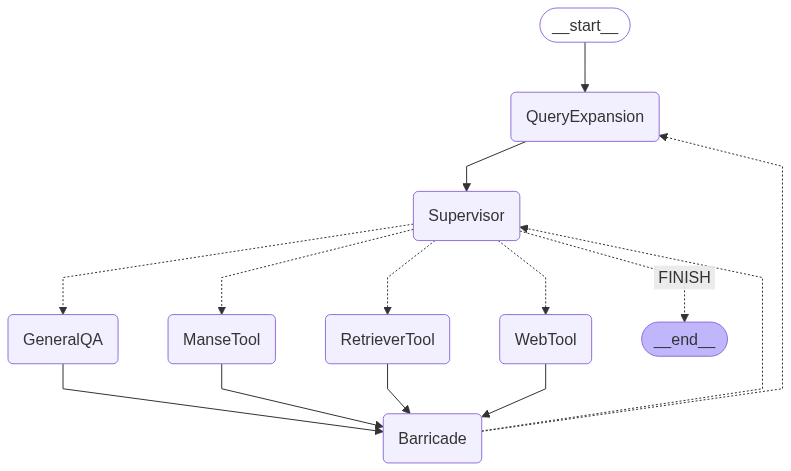

In [56]:
graph2

In [91]:
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver

# Query Expansion 노드가 포함된 그래프 생성
workflow = StateGraph(AgentState)

# 멤버(agent) 노드
workflow.add_node("ManseTool", manse_tool_agent_node)
workflow.add_node("RetrieverTool", retriever_tool_agent_node)
workflow.add_node("WebTool", web_tool_agent_node)
workflow.add_node("GeneralQA", general_qa_agent_node)
workflow.add_node("QueryExpansion", query_expansion_node)

# Supervisor 노드
workflow.add_node("Supervisor", supervisor_agent)

# Barricade(적절성 평가) 노드
workflow.add_node("Barricade", barricade_node)

members = ["ManseTool", "RetrieverTool", "WebTool", "GeneralQA"]

# 시작점
# workflow.add_edge(START, "QueryExpansion")

workflow.add_edge(START, "Supervisor")


# Supervisor → (각 툴 or FINISH)
conditional_map = {k: k for k in members}  # 각 툴 이름
conditional_map["Barricade"] = "Barricade"    # FINISH일 때만 Barricade로

def get_next(state):
    return state["next"]

workflow.add_conditional_edges("Supervisor", get_next, conditional_map)

# 각 툴 → Supervisor
for member in members:
    workflow.add_edge(member, "Supervisor")

# Barricade → END(적절) / QueryExpansion(부적절)
def barricade_next(state):
    return state["next"]

workflow.add_conditional_edges("Barricade", barricade_next, {
    "FINISH": END,
    "QueryExpansion": "Supervisor"
})
# workflow.add_edge("QueryExpansion", "Supervisor")

graph = workflow.compile(checkpointer=MemorySaver())

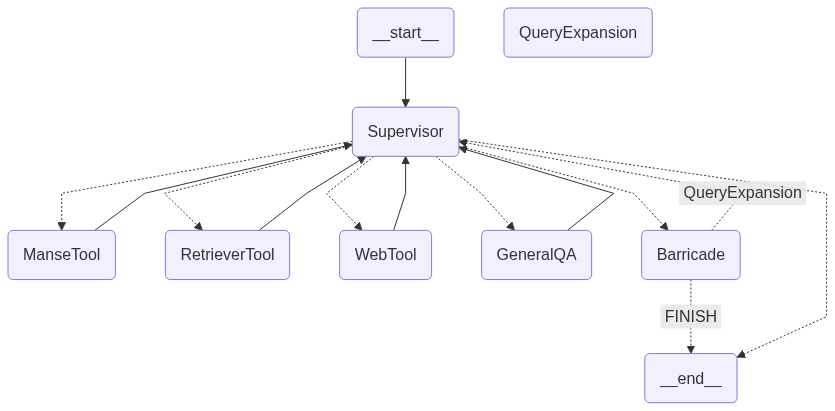

In [90]:
graph

In [86]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=30, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="1995년 3월 28일 남자, 12시 30분 출생 운세봐줘"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
=== 사주팔자 ===
년주(年柱): 을해
월주(月柱): 기묘
일주(日柱): 무오
시주(時柱): 무오
일간(日干): 무

=== 오행 강약 ===
목: 39점
화: 20점
토: 68점
금: 0점
수: 10점

=== 십신 분석 ===
년주: 천간:정관, 지지:편재(70%), 지지:편관(30%)
월주: 천간:겁재, 지지:정관(100%)
일주: 지지:정인(70%), 지지:겁재(30%)
시주: 지지:정인(70%), 지지:겁재(30%)

=== 대운 (정밀 계산) ===
5세: 무인 (2000년 ~ 2009년)
15세: 정축 (2010년 ~ 2019년)
25세: 병자 (2020년 ~ 2029년)
35세: 을해 (2030년 ~ 2039년)
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
1995년 3월 28일 12시 30분 출생 남성의 사주팔자를 분석해보면 다음과 같습니다.

- 년주: 을해
- 월주: 기묘
- 일주: 무오
- 시주: 무오
- 일간: 무

오행의 강약은 토가 가장 강하고, 목과 화가 그 다음이며 금은 매우 약한 편입니다.

십신 분석에 따르면 년주는 정관과 편재, 편관이 혼재되어 있고, 월주는 겁재와 정관, 일주와 시주는 정인과 겁재가 주를 이룹니다.

대운은 5세부터 무인, 15세부터 정축, 25세부터 병자, 35세부터 을해 대운이 돌아오고 있습니다.

이 사주는 토의 기운이 강해 안정적이고 현실적인 성향이 강하며, 목과 화의 기운이 있어 창의력과 활발함도 겸비되어 있습니다. 금의 기운이 약해 결단력이나 변화에 대

In [87]:
# 추가질문 -> 바로 retriever tool로 들어갔다

In [88]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="대운과 세운분석 자세히 해줘"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요. 1995년 3월 28일 12시 30분 출생 남성분의 대운과 세운을 자세히 분석해 드리겠습니다.

---

## 1. 대운(大運) 분석

### 대운 시작 나이 및 방향

- 남성 기준으로 대운은 출생 후 5세부터 시작합니다.
- 대운은 출생 월의 절기(양력 3월 28일은 춘분(3월 20일) 이후이므로 봄철) 기준으로 앞으로 진행합니다.

### 대운 목록 (10년 단위)

| 대운 기간 | 대운 사주 | 오행 구성 | 해석 |
|-----------|-----------|-----------|-------|
| 5~14세   | 무인(戊寅) | 토(土), 목(木) | 토와 목의 조화로 성장기, 기초를 다지는 시기 |
| 15~24세  | 정축(丁丑) | 화(火), 토(土) | 화와 토의 기운으로 활발한 활동과 안정 추구 |
| 25~34세  | 병자(丙子) | 화(火), 수(水) | 화와 수의 조화로 변화와 도전, 감성적 성장 |
| 35~44세  | 을해(乙亥) | 목(木), 수(水) | 목과 수의 기운 강화, 새로운 기회와 발전 |

### 대운별 상세 해석

- **무인(5~14세)**: 토와 목의 기운이 강해 기초 학습과 인성 형성에 좋은 시기입니다. 부모나 스승의 도움을 받기 좋습니다.
- **정축(15~24세)**: 화와 토가 조화를 이루어 사회 진출 준비와 자기 표현이 활발해집니다. 다만 토가 강해 스트레스 관리 필요.
- **병자(25~34세)**: 화와 수의 조합으로 변화와 도전의 시기입니다. 새로운 일에 도전하거나 감성적 성장이 이루어집니다. 다만 수가 약해 감정 기복 주의.
- **을해(35~44세)**: 목과 수가 보강되어 창의력과 지혜가 증대됩니다. 새로운 기회가 많고 인맥 확

In [62]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="난 미래에 대한 대운과 세운분석이 궁금해"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
I am curious about the analysis of my luck cycles (Da Yun) and annual luck (Se Yun) in relation to my Four Pillars of Destiny (Ba Zi). Specifically, I would like to understand how these cycles will influence my future and what insights can be drawn from my birth chart analysis. Could you provide guidance on what to expect in the coming years based on my birth date?난 미래에 대한 대운과 세운분석이 궁금해
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요. 1995년 3월 28일 12시 30분 출생 남성분의 미래 대운과 세운을 중심으로 자세히 분석해 드리겠습니다.

---

## 1. 미래 대운(大運) 분석

### 1-1) 대운 시작 나이 및 진행 방향

- 출생 월이 3월(춘분 이후)이고 남성으로, 대운은 출생 후 앞으로 진행합니다.
- 대운은 약 6세부터 시작하여 10년 단위로 바뀝니다.

### 1-2) 미래 대운 목록 및 해석 (현재 30대 초반 기준)

| 대운 구간 (나이) | 대운 간지 | 오행 | 해석 및 영향 |
|------------------|-----------|------|--------------|
| 26~35세          | 갑술(甲戌) | 목, 토 | 성장과 안정의 시기, 현실적 노력과 성취가 중

In [63]:
# GeneralQA 도구 테스트 - 일반 질문
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 일반 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="나의 운세는 돈을 많이 벌 수 있을까?"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)



🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Will my Four Pillars of Destiny (Ba Zi) indicate that I have the potential to earn a significant amount of money in my lifetime? I am particularly interested in understanding how the elements in my birth chart analysis may influence my financial prospects and opportunities for wealth accumulation.나의 운세는 돈을 많이 벌 수 있을까?
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요. 1995년 3월 28일 12시 30분 출생 남성분의 사주를 바탕으로 재물운, 즉 돈을 많이 벌 수 있는 가능성에 대해 분석해 드리겠습니다.

---

## 1. 사주 구조 및 오행 분포 요약

- 년주: 을해(乙亥) - 목, 수
- 월주: 기묘(己卯) - 토, 목
- 일주: 무오(戊午) - 토, 화
- 시주: 무오(戊午) - 토, 화

오행 분포:  
- 토(土) 3점 (강함)  
- 목(木) 2점  
- 화(火) 2점  
- 수(水) 1점  
- 금(金) 0점 (부족)

---

## 2. 재물운 관련 십신(十神) 분석

- 재물과 관련된 십신은 편재(偏財)와 정재(正財)입니다.
- 본 사주에서 재물운을 나타내는 편재는 년간 乙(목)으로 나타납니다.
- 편재는 외부 재물, 기회, 투자, 사업운을 의미하며, 재물을 얻기 위한 적극적이고 창의적인 능력을 나타냅니다.
- 정재는 월간이나 다른 위치에 없으나, 

In [64]:
# Enhanced Retriever with Query Expansion 테스트
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 2})

# 한글 사주 질문으로 테스트 (Query Expansion이 작동할 질문)
inputs = {
    "messages": [
        HumanMessage(
            content="정관이 뭐야? 상세히 설명해줘"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
What is the concept of "Jeonggwan" (正官) in the context of the Four Pillars of Destiny (Ba Zi)? Please provide a detailed explanation, including its significance in birth chart analysis and how it influences an individual's personality, career, and relationships.정관이 뭐야? 상세히 설명해줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
"정관"은 여러 가지 의미가 있을 수 있지만, 일반적으로 두 가지 주요 의미로 사용됩니다.

1. **사주명리학에서의 정관(正官)**:
   - 사주명리학(사주팔자)에서 정관은 십신(十神) 중 하나로, '관(官)'은 관직, 권위, 규율, 법도 등을 상징합니다.
   - 정관은 자신의 일간(자신을 나타내는 천간)과 음양이 반대이고, 오행이 상생하는 관계에 있는 관성을 말합니다.
   - 예를 들어, 일간이 양목(木)일 때, 정관은 음금(陰金)이 됩니다.
   - 정관은 주로 사회적 지위, 직업, 명예, 규범, 책임감, 권위 등을 나타내며, 특히 남성의 경우 아내나 배우자를 의미하기도 합니다.
   - 정관이 강하거나 좋은 위치에 있으면 사회적으로 인정받고 규범을 잘 따르는 성격으로 해석됩니다.
   - 반대로 정관이 약하거나 충돌하면 권위에 대한 저항, 규율 위반, 스트레스 등이 나타날 수 있습니다.

2. **법률 및 기업에서의 정관(定款)**:
   - 회사나 단체의 조직, 목적, 운영 

In [65]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, invoke_graph

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="사주의 개념에 대해서 알려줘"
        )
    ],
}

# 그래프 실행
invoke_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================ Human Message =================================

사주의 개념에 대해서 알려줘

🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
next:
WebTool

🔄 Node: agent in [WebTool] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================== Ai Message ==================================

사주(四柱)는 한국과 중국 등 동아시아에서 전통적으로 사용되는 운명학의 한 분야로, 사람의 태어난 연도, 월, 일, 시를 기준으로 하여 그 사람의 운명과 성격, 미래의 길흉화복을 예측하는 체계입니다. 

사주는 '네 기둥'이라는 뜻으로, 태어난 연도, 월, 일, 시를 각각 한 기둥으로 보고, 각 기둥은 천간(10간)과 지지(12지)라는 두 가지 요소로 구성됩니다. 그래서 총 8개의 글자(4기둥 × 2글자)를 사용해 분석하기 때문에 '팔자'라고도 부릅니다.

사주 분석은 이 8글자에 포함된 오행(목, 화, 토, 금, 수)의 상호작용과 균형을 통해 개인의 성격, 건강, 직업, 인간관계, 운세 등을 해석합니다. 또한, 음양의 조화도 중요한 요소로 작용합니다.

요약하면, 사주는 태어난 시간 정보를 바탕으로 한 동양의 전통적인 운명 해석 방법이며, 개인의 삶의 방향과 운명을 이해하는 데 도움을 주는 도구입니다.

🔄 Node: WebTool 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================ Human Message ==

In [66]:
# # GeneralQA 도구 테스트 - 일반 질문
# from langchain_core.runnables import RunnableConfig
# from langchain_teddynote.messages import random_uuid, stream_graph

# # config 설정(재귀 최대 횟수, thread_id)
# config = RunnableConfig(recursion_limit=10, configurable={"thread_id": 2})

# # 일반 질문 입력
# inputs = {
#     "messages": [
#         HumanMessage(
#             content="파이썬에서 딕셔너리와 리스트의 차이점을 알려주세요"
#         )
#     ],
# }

# # 그래프 실행
# stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you explain the differences between a dictionary and a list in Python, particularly in the context of data structures used for organizing information? Additionally, I am interested in understanding how these concepts might relate to the analysis of a birth chart in Four Pillars of Destiny (Ba Zi), where different elements and their relationships can be likened to the way data is stored and accessed in these structures.파이썬에서 딕셔너리와 리스트의 차이점을 알려주세요
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
## 파이썬 딕셔너리와 리스트의 차이점

파이썬에서 딕셔너리(Dictionary)와 리스트(List)는 데이터를 저장하고 관리하는 데 사용되는 기본적인 자료구조이지만, 몇 가지 중요한 차이점이 있습니다.

**1. 데이터 접근 방식:**

*   **리스트 (List):**
    *   **순서 기반 접근:** 요소에 접근하기 위해 **인덱스**를 사용합니다. 인덱스는 0부터 시작하는 정수입니다.
    *   예: `my_list[0]` 은 리스트의 첫 번

KeyboardInterrupt: 

In [92]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 3})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="1995년 9월 22일 남자, 15시 29분 출생 운세봐줘"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
=== 사주팔자 ===
년주(年柱): 을해
월주(月柱): 을유
일주(日柱): 병진
시주(時柱): 병신
일간(日干): 병

=== 오행 강약 ===
목: 48점
화: 40점
토: 10점
금: 24점
수: 15점

=== 십신 분석 ===
년주: 천간:정인, 지지:편관(70%), 지지:편인(30%)
월주: 천간:정인, 지지:정재(100%)
일주: 지지:식신(60%), 지지:정인(30%), 지지:정관(10%)
시주: 지지:편재(60%), 지지:편관(30%), 지지:식신(10%)

=== 대운 (정밀 계산) ===
5세: 갑신 (2000년 ~ 2009년)
15세: 계미 (2010년 ~ 2019년)
25세: 임오 (2020년 ~ 2029년)
35세: 신사 (2030년 ~ 2039년)
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
1995년 9월 22일 15시 29분 출생 남성의 사주팔자를 분석해보면 다음과 같습니다.

- 년주: 을해
- 월주: 을유
- 일주: 병진
- 시주: 병신
- 일간: 병화

오행의 강약은 목 48점, 화 40점, 토 10점, 금 24점, 수 15점으로 목과 화가 강한 편입니다.

십신 분석에서는 정인과 편관, 편인, 정재, 식신, 정관, 편재 등이 조화를 이루고 있습니다.

대운은 다음과 같이 진행됩니다.
- 5세부터 14세: 갑신 대운 (2000년~2009년)
- 15세부터 24세: 계미 대운 (2010년~2019년)
- 25세부터 34세: 임오 대운 (2020년~2029년)
- 35세부터 44세: 신사